In [11]:
import psycopg2
import psycopg2.extras
import pandas as pd

# Connect to the database
connection = psycopg2.connect(host= #info removed,
                             user= #info removed,
                             port= #info removed,
                             database= #info removed,
                             password= #info removed)
connection.set_session(readonly=True, autocommit=True)

cursor = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

## Task 1

Create a pandas dataframe that is loaded with the records returned from joining the **favorites**, **statuses**, and **users** tables.
 - You may limit output to improve response time (I would recommend 100 records to start)

_Note: Ensure you are joining tables based on their foreign key dependencies_

In [21]:
# Space for work
df = pd.read_sql("""SELECT * FROM (SELECT *
                    FROM twitter.users JOIN twitter.statuses
                        On users.user_id = statuses.user_id) as tmp
                    JOIN twitter.favorites
                        On favorites.status_id = tmp.status_id 
                    limit 100""",
                 connection)
df.head()

C:\Users\alays\AppData\Local\Temp\ipykernel_15032\2383215230.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""SELECT * FROM (SELECT *


,created_date,description,favorites_count,friends_count,user_id,listed_count,location,name,screen_name,statuses_count,...,status_id,lang,retweet_count,source,text,truncated,user_id,status_id,user_id,user_screen_name
0,2019-02-01,"4th from the Sun, also known as the Red Planet...",4533,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,...,1347275693474734080,en,2632,"<a href=""http://twitter.com/download/android"" ...",.@elonmusk when's our first date? You've been ...,None,1091459141397180416,1347275693474734080,1068831,slashdot
1,2019-02-01,"4th from the Sun, also known as the Red Planet...",4533,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,...,1347275693474734080,en,2632,"<a href=""http://twitter.com/download/android"" ...",.@elonmusk when's our first date? You've been ...,None,1091459141397180416,1347275693474734080,14171401,mayemusk
2,2019-02-01,"4th from the Sun, also known as the Red Planet...",4533,72,1091459141397180416,121,The Milkyway Galaxy,Mars,4thFromOurStar,253,...,1347275693474734080,en,2632,"<a href=""http://twitter.com/download/android"" ...",.@elonmusk when's our first date? You've been ...,None,1091459141397180416,1347275693474734080,1060180551544528897,flcnhvy
3,2014-12-06,The ocular engine. \nSources: @archillinks\nht...,9599,1,2907774137,8781,Meta,Archillect,archillect,319440,...,1348686575903895562,und,979,"<a href=""http://machinu.net"" rel=""nofollow"">Ar...",https://t.co/rG5b4t9Wp6,None,2907774137,1348686575903895562,781773798085365760,krstnbrndtt
4,2014-12-06,The ocular engine. \nSources: @archillinks\nht...,9599,1,2907774137,8781,Meta,Archillect,archillect,319440,...,1348570444325130240,und,1073,"<a href=""http://machinu.net"" rel=""nofollow"">Ar...",https://t.co/6D4MOUv4hy,None,2907774137,1348570444325130240,781773798085365760,krstnbrndtt


## Task 2
Write a function, ***get_all_users_tweets(user)***, that takes a user's **screen_name or id** and returns the **count of the number of unique tweets (int)** the user has made.

In [6]:
# Space for work
def get_all_users_tweets(user):
# """ Takes  user's id. Returns the count of the number of unique tweets 
#     (int) the user has made.
    
#     Args:
#         user: user id
#     Return:
#         Count (int) 
# """
    
    #query the database and store in cursor
    cursor.execute("""SELECT count(distinct(status_id)), user_id FROM twitter.statuses 
                    WHERE user_id = '{0:n}' GROUP BY user_id""".format(user))
    
    #gather the results from the cursor and assign to variable 
    tweet_counts = cursor.fetchall()
    
    #print the results when function is called
    return tweet_counts

#test function
get_all_users_tweets(1091459141397180416)

[RealDictRow([('count', 91), ('user_id', '1091459141397180416')])]

## Task 3

 1. Calculate the average retweet count per user
  - You must accomplish this using a **single SQL query**
  - _Hint: GROUP BY will be helpful_
 2. Plot the distribution of the averages, where the average is greater than 0 and less than 5000

*Note: For this task use the **retweet_count** column in the **statuses** table*

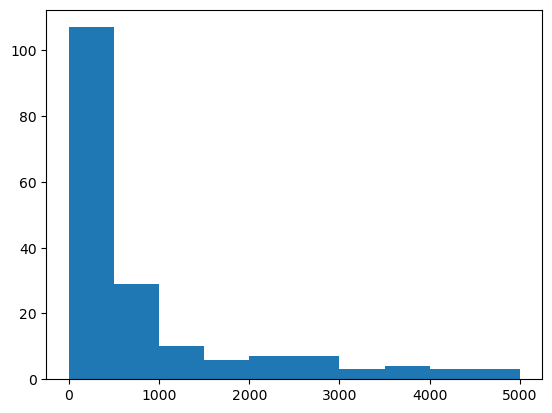

In [57]:
import matplotlib.pyplot as plt
# Space for work

#query database and store it in cursor
cursor.execute("""SELECT avg(retweet_count) FROM (SELECT retweet_count, user_id FROM twitter.statuses) as tbl
                group by tbl.user_id""")

#gather the results from the cursor and assign to variable 
avg = cursor.fetchall()

#display averages
avg_df = pd.DataFrame.from_dict(avg)

#plot the distribution
plt.hist(avg_df, range = (0,5000))
plt.show()

## Task 4

 1. Write a function that takes a user's screen_name or id and determines, using a SQL query, the number of secondary friends that user has (friends of friends).
 2. Write a couple of sentences about how this function/query would need to change if we wanted to further extend the number of hops or tertiary/etc. friends we wanted to evaluate.

In [23]:
# Space for work
def get_friend_of_friend(user):
# """ Takes  user's id. Returns the count of  the number
#     of secondary friends of user (int).
    
#     Args:
#         user: user id
#     Return:
#         Count (int) 
# """
    
    #query the database and store in cursor
    cursor.execute("""SELECT count(*) FROM (SELECT distinct(f.friend_id) FROM twitter.friends f
                    WHERE  f.user_id IN (SELECT friend_id FROM twitter.friends
                    WHERE user_screen_name = '{0:s}')) as tbl """.format(user))
    
    #gather the results from the cursor and assign to variable 
    friend_count = cursor.fetchall()
    
    #print the results when function is called
    return friend_count

#test function
get_friend_of_friend('elonmusk')

[RealDictRow([('count', 94)])]

## Task 5
Write a function that will determine, for a given user, the percentage of their favorite tweets that were made by their friends:

$$\frac{\text{# of tweets favorited by the user and made by the user's friends}}{\text{# of tweets favorited by user}}$$

_Note: # of favorited tweets should be based off of the **favorites** table, and friendship should be based off of the **friends** table_

**Hint: For user - 'elonmusk' you should get $\frac{88}{224}$ or ~39.3%**

In [24]:
# Space for work
def get_fav_percent(user):
# """ Takes  user's id. Returns the count of  the number
#     of secondary friends of user (int).
    
#     Args:
#         user: user id
#     Return:
#         Percentage (int) 
# """
    
    #query the database and store in cursor
    cursor.execute("""SELECT count(*) FROM twitter.favorites
                    WHERE user_screen_name = '{0:s}'""".format(user))
    
    #gather the results from the cursor and assign to variable 
    fav_by_user = cursor.fetchall()
    fav_by_user = pd.DataFrame(fav_by_user)
    # fav_by_user = fav_by_user['count']
    
    #query the database and store in cursor (favorite made by friend)
    cursor.execute("""SELECT status_id, user_id FROM twitter.statuses s WHERE s.status_id IN 
                    (SELECT status_id FROM twitter.favorites
                    WHERE user_screen_name = '{0:s}') AND s.user_id IN
                    (SELECT friend_id FROM twitter.friends
                    WHERE user_screen_name = '{0:s}')""".format(user))
   
    #gather the results from the cursor and assign to variable 
    fav_made_by_friend = cursor.fetchall()
    fav_made_by_friend = pd.DataFrame(fav_made_by_friend)
    # fav_made_by_friend = fav_made_by_friend['count']
    
    #create the ratio 
    ratio = len(fav_made_by_friend)/ fav_by_user['count']   

    #turn into a percentage
    percent = ratio * 100

    #print the results when function is called
    return percent

#test function
get_fav_percent('elonmusk')


0    39.285714
Name: count, dtype: float64